# Finance and Risk Analytics Project

## Part 1 - Credit Risk

The dataset contains information on default payments & company details of Companies in India. You are requested to create a Credit Risk Model, using the data provided. Please use the logistic regression framework to develop the credit default model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
credit=pd.read_csv("Credit_RiskProject_Data.csv")

In [3]:
credit.head()

,Company_Code,Networth Next Year,Capital Employed,Net Working Capital,Current Assets,Total Sales,Retained Earnings,PBDT,PBIT,PBT,...,EPS (Annualised) (Adjusted) (Unit Curr),APATM (%)[Latest],Creditors Velocity (Days),Total Liabilities,Total Equity,Market Value of Equity,total assets,Cost of Production,Current Ratio,Gross Block
0,16974,-8021.60,-1007.24,-1076.34,40.50,0.00,7.60,-926.52,-185.53,-932.99,...,0.0,0.00,0.0,5936.03,419.36,0.00,6355.39,137.67,0.02,474.30
1,21214,-3986.19,4458.20,-1098.88,486.86,2892.73,46.27,-4.32,35.53,-615.25,...,0.0,-87.18,101.0,7410.18,1954.93,1544.39,9365.11,2572.46,0.08,9070.86
2,14852,-3192.58,7714.68,4496.25,9097.64,392.13,9.55,-1086.71,-381.10,-1185.89,...,0.0,-7961.51,558.0,6944.54,53.84,1220.81,6998.38,408.51,1.06,1281.54
3,2439,-3054.51,2353.88,-2612.42,1034.12,1354.39,223.85,-677.57,-336.73,-801.29,...,0.0,-51.58,63.0,2326.05,157.30,194.27,2483.35,1326.99,0.09,1033.69
4,23505,-2967.36,4675.33,1836.23,4685.81,38.72,9.82,-944.42,-710.13,-1006.69,...,0.0,274.79,346.0,5740.90,50.30,113.68,5791.20,186.29,0.50,1084.20


In [4]:
credit.columns = credit.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '').str.replace(']', '').str.replace('.', '')

In [5]:
credit.shape

(3586, 24)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   int64  
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3576 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3574 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_as_perc_of_total_income        3586 non-null   float64
 11  PAT                                3586 non-null   float

In [7]:
## Converting Company Code to String as it is a nominal variable
credit['Company_Code'] = credit['Company_Code'].astype(str)

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   object 
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3576 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3574 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_as_perc_of_total_income        3586 non-null   float64
 11  PAT                                3586 non-null   float

In [9]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60000,3.9850,19.015000,123.8025,111729.10
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75000,7.6025,39.090000,226.6050,714001.25
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42000,0.9425,10.145000,61.1750,223257.56
Current_Assets,3576.0,1964.679298,22608.950227,-0.91000,3.9975,24.540000,135.1525,721166.00
Total_Sales,3586.0,1079.702579,9996.574173,-62.59000,1.4400,30.440000,234.4400,443775.16
Retained_Earnings,3586.0,48.729824,426.040665,-448.72000,0.0200,0.450000,3.6350,14143.40
PBDT,3586.0,116.268795,956.199566,-5874.53000,0.0000,0.795000,12.9450,23215.00
PBIT,3574.0,218.167440,1854.025961,-4812.95000,0.0000,1.150000,16.6925,41402.96
PBT,3586.0,85.752909,799.925768,-6032.34000,-0.0600,0.310000,7.4225,16798.00
PBT_as_perc_of_total_income,3586.0,6.035648,464.867049,-13521.66667,0.0000,0.407407,4.0000,15370.00


## EDA

### Outlier Treatment

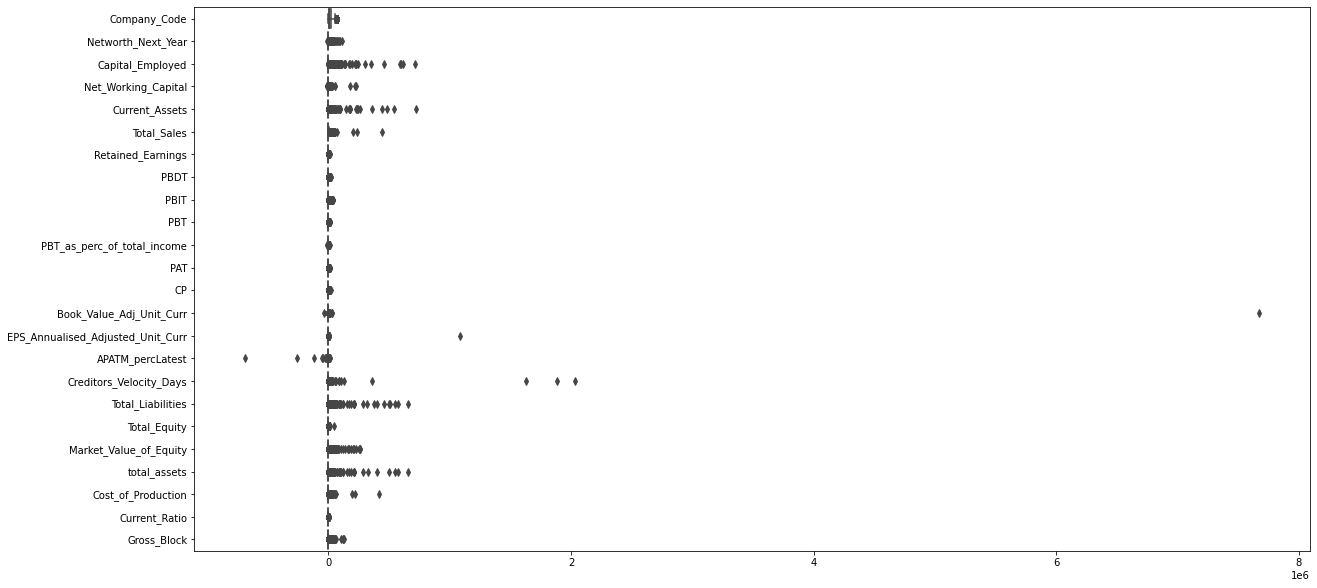

In [10]:
plt.figure(figsize=(20,10))
boxplot=sns.boxplot(data=credit, width=0.8,orient='h')
plt.show()

In [11]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for i in credit.columns:
    if credit[i].dtype !='object':
        lr,ur=outlier_treatment(credit[i])
        credit[i]=np.where(credit[i]>ur,ur,credit[i])
        credit[i]=np.where(credit[i]<lr,lr,credit[i])

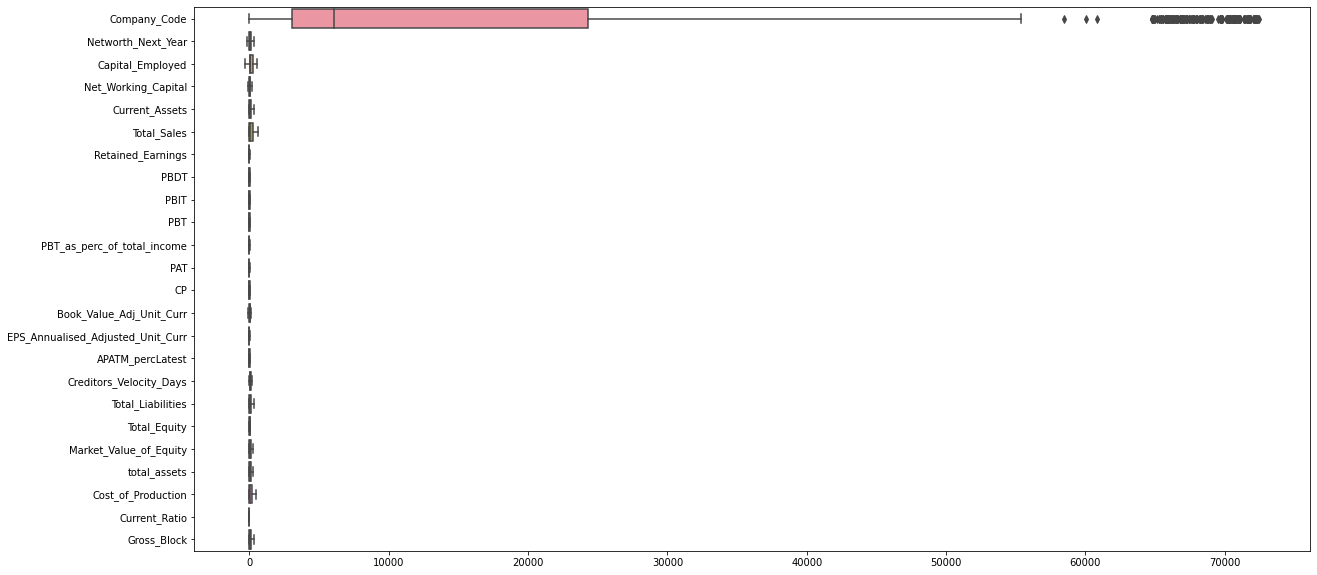

In [13]:
plt.figure(figsize=(20,10))
boxplot=sns.boxplot(data=credit, width=0.8,orient='h')
plt.show()

### Missing Value Treatment	

In [14]:
credit.isnull().sum()

Company_Code                          0
Networth_Next_Year                    0
Capital_Employed                      0
Net_Working_Capital                   0
Current_Assets                       10
Total_Sales                           0
Retained_Earnings                     0
PBDT                                  0
PBIT                                 12
PBT                                   0
PBT_as_perc_of_total_income           0
PAT                                   0
CP                                    0
Book_Value_Adj_Unit_Curr             17
EPS_Annualised_Adjusted_Unit_Curr     4
APATM_percLatest                      1
Creditors_Velocity_Days               8
Total_Liabilities                    59
Total_Equity                          0
Market_Value_of_Equity                0
total_assets                          0
Cost_of_Production                    0
Current_Ratio                         1
Gross_Block                           0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df = pd.DataFrame(imputer.fit_transform(credit),columns=credit.columns)
df.columns=credit.columns
df.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,EPS_Annualised_Adjusted_Unit_Curr,APATM_percLatest,Creditors_Velocity_Days,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block
0,16974.0,-175.74125,-320.90125,-89.40625,40.500,0.00,7.6000,-19.4175,-25.03875,-11.28375,...,0.0,0.000,0.0,299.715,43.23125,0.00000,242.48625,137.670,0.02,328.8825
1,21214.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-4.3200,35.53000,-11.28375,...,0.0,-11.115,101.0,299.715,43.23125,278.64375,242.48625,472.465,0.08,328.8825
2,14852.0,-175.74125,555.10875,151.52375,331.885,392.13,9.0575,-19.4175,-25.03875,-11.28375,...,0.0,-11.115,210.5,299.715,43.23125,278.64375,242.48625,408.510,1.06,328.8825
3,2439.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-19.4175,-25.03875,-11.28375,...,0.0,-11.115,63.0,299.715,43.23125,194.27000,242.48625,472.465,0.09,328.8825
4,23505.0,-175.74125,555.10875,151.52375,331.885,38.72,9.0575,-19.4175,-25.03875,-11.28375,...,0.0,18.525,210.5,299.715,43.23125,113.68000,242.48625,186.290,0.50,328.8825


In [16]:
df.isnull().sum()

Company_Code                         0
Networth_Next_Year                   0
Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj_Unit_Curr             0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
dtype: int64

### New Variables Creation 	


In [17]:
df['Return_on_Total_Asset']=df['PBT']/df['total_assets']
df.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,APATM_percLatest,Creditors_Velocity_Days,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block,Return_on_Total_Asset
0,16974.0,-175.74125,-320.90125,-89.40625,40.500,0.00,7.6000,-19.4175,-25.03875,-11.28375,...,0.000,0.0,299.715,43.23125,0.00000,242.48625,137.670,0.02,328.8825,-0.046534
1,21214.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-4.3200,35.53000,-11.28375,...,-11.115,101.0,299.715,43.23125,278.64375,242.48625,472.465,0.08,328.8825,-0.046534
2,14852.0,-175.74125,555.10875,151.52375,331.885,392.13,9.0575,-19.4175,-25.03875,-11.28375,...,-11.115,210.5,299.715,43.23125,278.64375,242.48625,408.510,1.06,328.8825,-0.046534
3,2439.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-19.4175,-25.03875,-11.28375,...,-11.115,63.0,299.715,43.23125,194.27000,242.48625,472.465,0.09,328.8825,-0.046534
4,23505.0,-175.74125,555.10875,151.52375,331.885,38.72,9.0575,-19.4175,-25.03875,-11.28375,...,18.525,210.5,299.715,43.23125,113.68000,242.48625,186.290,0.50,328.8825,-0.046534


In [18]:
df['Profit_on_Margin']=df['PBT']/df['Total_Sales']
df.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,Creditors_Velocity_Days,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block,Return_on_Total_Asset,Profit_on_Margin
0,16974.0,-175.74125,-320.90125,-89.40625,40.500,0.00,7.6000,-19.4175,-25.03875,-11.28375,...,0.0,299.715,43.23125,0.00000,242.48625,137.670,0.02,328.8825,-0.046534,-inf
1,21214.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-4.3200,35.53000,-11.28375,...,101.0,299.715,43.23125,278.64375,242.48625,472.465,0.08,328.8825,-0.046534,-0.019323
2,14852.0,-175.74125,555.10875,151.52375,331.885,392.13,9.0575,-19.4175,-25.03875,-11.28375,...,210.5,299.715,43.23125,278.64375,242.48625,408.510,1.06,328.8825,-0.046534,-0.028776
3,2439.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-19.4175,-25.03875,-11.28375,...,63.0,299.715,43.23125,194.27000,242.48625,472.465,0.09,328.8825,-0.046534,-0.019323
4,23505.0,-175.74125,555.10875,151.52375,331.885,38.72,9.0575,-19.4175,-25.03875,-11.28375,...,210.5,299.715,43.23125,113.68000,242.48625,186.290,0.50,328.8825,-0.046534,-0.291419


In [19]:
df['Debt_to_Equity_Ratio']=df['Total_Liabilities']/df['Total_Equity']
df.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block,Return_on_Total_Asset,Profit_on_Margin,Debt_to_Equity_Ratio
0,16974.0,-175.74125,-320.90125,-89.40625,40.500,0.00,7.6000,-19.4175,-25.03875,-11.28375,...,299.715,43.23125,0.00000,242.48625,137.670,0.02,328.8825,-0.046534,-inf,6.932832
1,21214.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-4.3200,35.53000,-11.28375,...,299.715,43.23125,278.64375,242.48625,472.465,0.08,328.8825,-0.046534,-0.019323,6.932832
2,14852.0,-175.74125,555.10875,151.52375,331.885,392.13,9.0575,-19.4175,-25.03875,-11.28375,...,299.715,43.23125,278.64375,242.48625,408.510,1.06,328.8825,-0.046534,-0.028776,6.932832
3,2439.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-19.4175,-25.03875,-11.28375,...,299.715,43.23125,194.27000,242.48625,472.465,0.09,328.8825,-0.046534,-0.019323,6.932832
4,23505.0,-175.74125,555.10875,151.52375,331.885,38.72,9.0575,-19.4175,-25.03875,-11.28375,...,299.715,43.23125,113.68000,242.48625,186.290,0.50,328.8825,-0.046534,-0.291419,6.932832


### Transform target variable into 0 and 1

In [20]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [21]:
df.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block,Return_on_Total_Asset,Profit_on_Margin,Debt_to_Equity_Ratio,default
0,16974.0,-175.74125,-320.90125,-89.40625,40.500,0.00,7.6000,-19.4175,-25.03875,-11.28375,...,43.23125,0.00000,242.48625,137.670,0.02,328.8825,-0.046534,-inf,6.932832,1
1,21214.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-4.3200,35.53000,-11.28375,...,43.23125,278.64375,242.48625,472.465,0.08,328.8825,-0.046534,-0.019323,6.932832,1
2,14852.0,-175.74125,555.10875,151.52375,331.885,392.13,9.0575,-19.4175,-25.03875,-11.28375,...,43.23125,278.64375,242.48625,408.510,1.06,328.8825,-0.046534,-0.028776,6.932832,1
3,2439.0,-175.74125,555.10875,-89.40625,331.885,583.94,9.0575,-19.4175,-25.03875,-11.28375,...,43.23125,194.27000,242.48625,472.465,0.09,328.8825,-0.046534,-0.019323,6.932832,1
4,23505.0,-175.74125,555.10875,151.52375,331.885,38.72,9.0575,-19.4175,-25.03875,-11.28375,...,43.23125,113.68000,242.48625,186.290,0.50,328.8825,-0.046534,-0.291419,6.932832,1


In [22]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [23]:
(388/(3198+388))*100

10.819854991634132

In [24]:
df['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64


### Perform Univariate & bivariate analysis(including Heatmap)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2c6657d0>]],
      dtype=object)

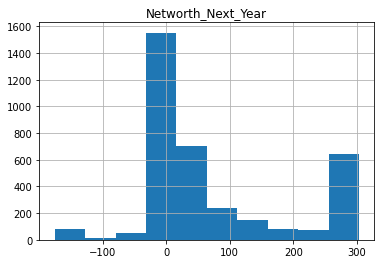

In [25]:
df.hist("Networth_Next_Year")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2b4663d0>]],
      dtype=object)

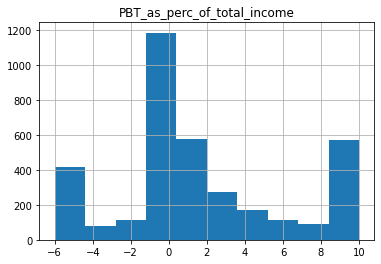

In [26]:
df.hist("PBT_as_perc_of_total_income")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2b46cc50>]],
      dtype=object)

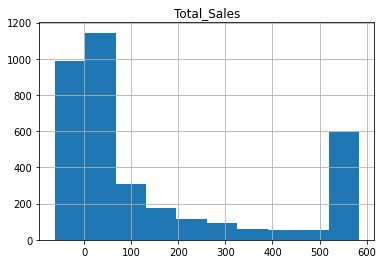

In [27]:
df.hist("Total_Sales")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec29f7c5d0>]],
      dtype=object)

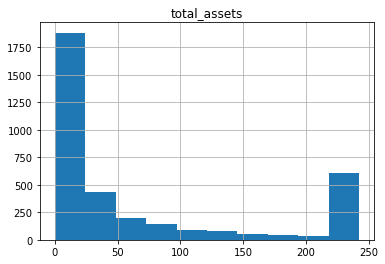

In [28]:
df.hist("total_assets")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2b54d4d0>]],
      dtype=object)

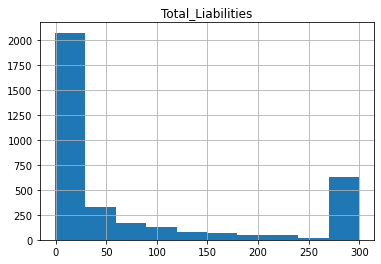

In [29]:
df.hist("Total_Liabilities")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2b53bb50>]],
      dtype=object)

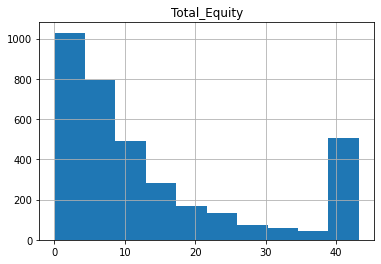

In [30]:
df.hist("Total_Equity")

#### Bivariate

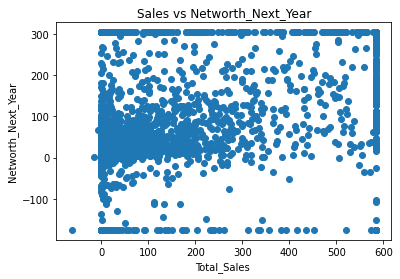

In [31]:
plt.scatter(df['Total_Sales'], df['Networth_Next_Year'])
plt.xlabel('Total_Sales ')
plt.ylabel('Networth_Next_Year')
plt.title('Sales vs Networth_Next_Year')
plt.show()

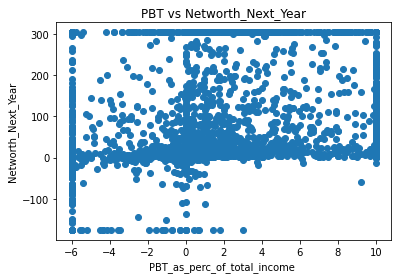

In [32]:
plt.scatter(df['PBT_as_perc_of_total_income'], df['Networth_Next_Year'])
plt.xlabel('PBT_as_perc_of_total_income ')
plt.ylabel('Networth_Next_Year')
plt.title('PBT vs Networth_Next_Year')
plt.show()

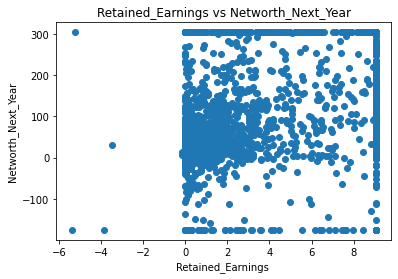

In [33]:
plt.scatter(df['Retained_Earnings'], df['Networth_Next_Year'])
plt.xlabel('Retained_Earnings ')
plt.ylabel('Networth_Next_Year')
plt.title('Retained_Earnings vs Networth_Next_Year')
plt.show()

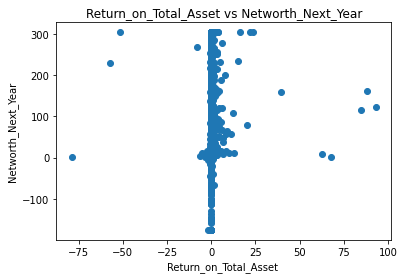

In [34]:
plt.scatter(df['Return_on_Total_Asset'], df['Networth_Next_Year'])
plt.xlabel('Return_on_Total_Asset ')
plt.ylabel('Networth_Next_Year')
plt.title('Return_on_Total_Asset vs Networth_Next_Year')
plt.show()

## to do pair plot for select variables

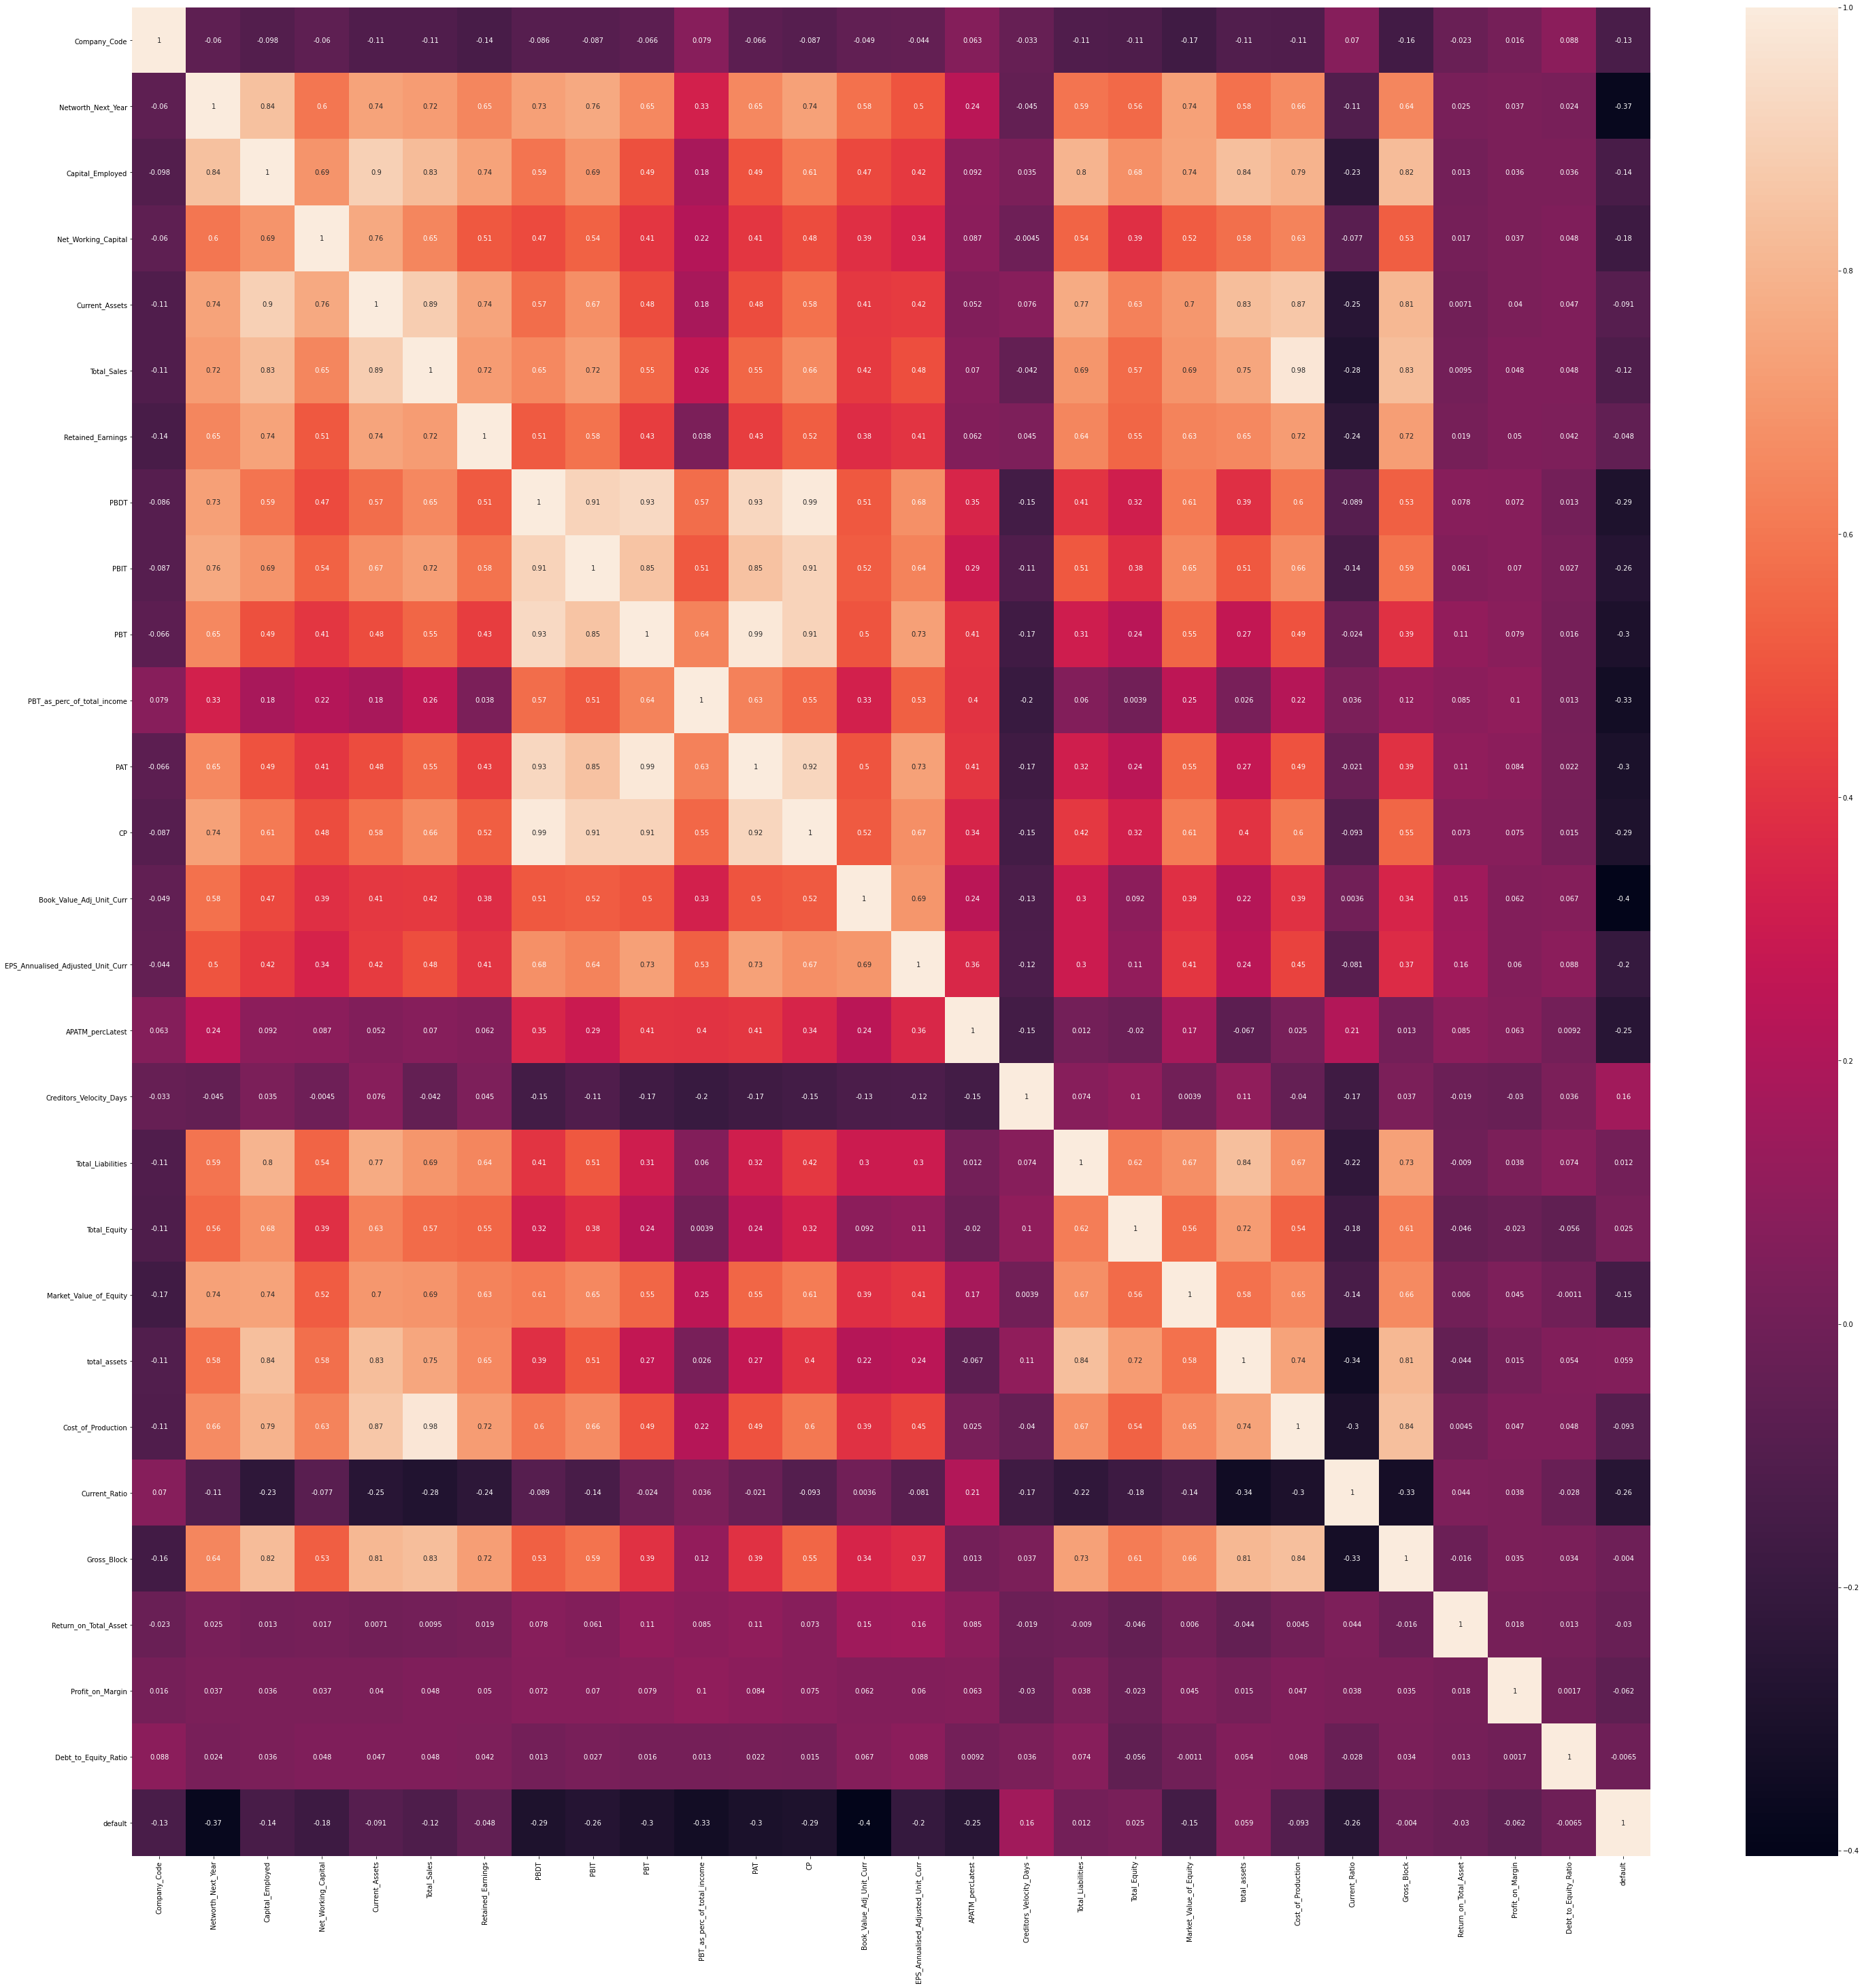

In [35]:
f,ax = plt.subplots(figsize =(50,50)) 
sns.heatmap(df.corr(), ax=ax,annot=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   float64
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3586 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3586 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_as_perc_of_total_income        3586 non-null   float64
 11  PAT                                3586 non-null   float

Perform Train Test Split
 


In [37]:
X = df.drop(['default','Networth_Next_Year','Company_Code','Profit_on_Margin'], axis=1)
y = df['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

credit_train = pd.concat([X_train,y_train], axis=1)
credit_test = pd.concat([X_test,y_test], axis=1)

## Modeling	 


In [38]:
# Multicollineairty

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
22,Return_on_Total_Asset,1.068453
23,Debt_to_Equity_Ratio,1.127704
13,APATM_percLatest,1.550954
14,Creditors_Velocity_Days,1.710998
20,Current_Ratio,1.849005
8,PBT_as_perc_of_total_income,2.357045
1,Net_Working_Capital,3.580593
11,Book_Value_Adj_Unit_Curr,3.824305
4,Retained_Earnings,4.416834
17,Market_Value_of_Equity,4.478716


In [40]:
X_train.columns

Index(['Capital_Employed', 'Net_Working_Capital', 'Current_Assets',
       'Total_Sales', 'Retained_Earnings', 'PBDT', 'PBIT', 'PBT',
       'PBT_as_perc_of_total_income', 'PAT', 'CP', 'Book_Value_Adj_Unit_Curr',
       'EPS_Annualised_Adjusted_Unit_Curr', 'APATM_percLatest',
       'Creditors_Velocity_Days', 'Total_Liabilities', 'Total_Equity',
       'Market_Value_of_Equity', 'total_assets', 'Cost_of_Production',
       'Current_Ratio', 'Gross_Block', 'Return_on_Total_Asset',
       'Debt_to_Equity_Ratio'],
      dtype='object')

In [41]:
model = 'default ~ Net_Working_Capital + Retained_Earnings + PBT_as_perc_of_total_income + Book_Value_Adj_Unit_Curr + APATM_percLatest + Creditors_Velocity_Days + Total_Equity + Market_Value_of_Equity + Return_on_Total_Asset + Debt_to_Equity_Ratio'

	 
### Build a Logistic Regression Model on most important variables on Train Dataset	12
 

In [42]:
import statsmodels.formula.api as SM

In [43]:
model_1 = SM.logit(formula = model, data=credit_train).fit()

Optimization terminated successfully.
         Current function value: 0.141041
         Iterations 10


In [44]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.5719
Time:                        23:41:40   Log-Likelihood:                -338.78
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.023e-188
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3737      0.173     -7.948      0.000      -1.712      -1.035
Net_Working_Capital             0.0035      0.003      1.161      0.246      -0.002       0.009
Retained_Earnings               0.1261      0.046      2.755      0.006       0.036       0.216
PBT_as_perc_of_total_income    -0.2138      0.035     -6.052      0.000      -0.283      -0.145
Book_Value_Adj_Unit_Curr       -0.1348      0.011    -12.007      0.000      -0.157      -0.113
APATM_percLatest               -0.0570      0.014     -4.046      0.000      -0.085      -0.029
Creditors_Velocity_Days         0.0012      0.001      0.980      0.327      -0.001       0.004
Total_Equity                   -0.0145      0.010     -1.443      0.149      -0.034       0.005
Market_Value_of_Equity         -0.0037      0.002     -1.900      0.057      -0.007       0.000
Return_on_Total_Asset           0.1289      0.027      4.810      0.000       0.076       0.181
Debt_to_Equity_Ratio           -0.0073      0.002     -3.100      0.002      -0.012      -0.003
===============================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [45]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.5592548921778961


#### Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

In [46]:
model2 = 'default ~ + Retained_Earnings + PBT_as_perc_of_total_income + Book_Value_Adj_Unit_Curr + APATM_percLatest + Return_on_Total_Asset + Debt_to_Equity_Ratio'

In [47]:
model_2 = SM.logit(formula = model2, data=credit_train).fit()

Optimization terminated successfully.
         Current function value: 0.143021
         Iterations 10


In [48]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2395
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.5659
Time:                        23:41:41   Log-Likelihood:                -343.54
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.337e-190
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.4520      0.125    -11.624      0.000      -1.697      -1.207
Retained_Earnings               0.0737      0.037      1.999      0.046       0.001       0.146
PBT_as_perc_of_total_income    -0.2053      0.034     -6.093      0.000      -0.271      -0.139
Book_Value_Adj_Unit_Curr       -0.1338      0.011    -12.221      0.000      -0.155      -0.112
APATM_percLatest               -0.0563      0.014     -4.058      0.000      -0.083      -0.029
Return_on_Total_Asset           0.1267      0.027      4.773      0.000       0.075       0.179
Debt_to_Equity_Ratio           -0.0070      0.002     -3.048      0.002      -0.011      -0.002
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We can see that all variables are significant & may be useful to discriminate cases of deault

Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables



In [49]:
calc_vif(X_train[['Retained_Earnings','PBT_as_perc_of_total_income', 'Book_Value_Adj_Unit_Curr' , 'APATM_percLatest' , 'Return_on_Total_Asset' , 'Debt_to_Equity_Ratio']]).sort_values(by='VIF', ascending = True)


,variables,VIF
4,Return_on_Total_Asset,1.044955
5,Debt_to_Equity_Ratio,1.046105
3,APATM_percLatest,1.344721
1,PBT_as_perc_of_total_income,1.477880
0,Retained_Earnings,1.554171
2,Book_Value_Adj_Unit_Curr,1.923329


We can see that multicollinearity still exists but lets not drop them as VIFs are not very high

In [50]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.5582991506620091


We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

We also notice that current model has no insignificant variables and can be used for prediction purposes.

Lets test the prediction of this model on train and test dataset

Prediction on Data

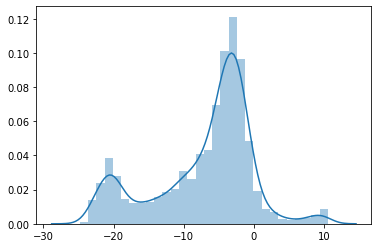

In [51]:
sns.distplot(model_2.fittedvalues);

In [52]:
## Prediction on Train set

y_predict_train = model_2.predict(X_train)
y_predict_train

662     1.148596e-01
1373    1.527113e-04
3268    3.224629e-09
3246    8.272237e-10
1456    7.793850e-03
            ...     
1130    1.053268e-05
1294    1.107609e-02
860     3.375309e-01
3507    7.866384e-03
3174    2.967797e-04
Length: 2402, dtype: float64

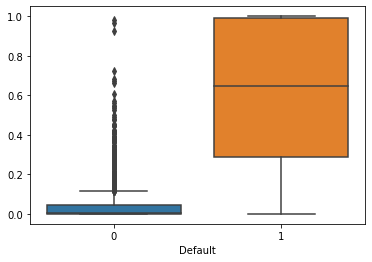

In [53]:
sns.boxplot(x=df['default'],y=y_predict_train)
plt.xlabel('Default');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

Let us now see the predicted classes


### State the accuracy, specificity, and sensitivity of the model based upon the optimized cutoff value	8


In [54]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

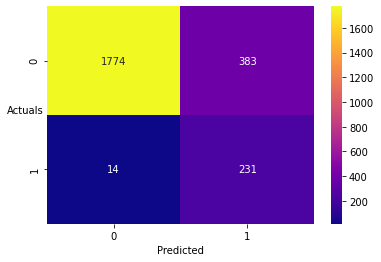

In [55]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [56]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1774 
False Positives: 383 
False Negatives: 14 
True Positives: 231


Confusion matrix terminologies:

Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN

Specificity (true negatives / all actual negatives) =TN / TN + FP

Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN

Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

In [57]:
#Calculating sensitivity of the model
232/(232+13)


0.9469387755102041

94% of those defaulted were correctly identified as defaulters by the model



In [58]:
#Calculating specificity of the model
1793/(1793+364)


0.8312471024571164

83% of those not defaulted were correctly identified as non-defaulters by the model



In [59]:
#Checking model efficiency
(232+1793)/(232+1793+364+13)


0.8430474604496253

Overall 84% of correct predictions to total predictions were made by the model



In [60]:
#Calculating misclassification rate
1-((232+1793)/(232+1793+364+13))

0.1569525395503747

Misclassification rate is at 16%

#### Let us now see the predicted classes with cutoff 0.08

In [61]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

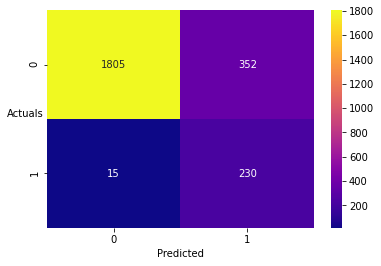

In [62]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [63]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1805 
False Positives: 352 
False Negatives: 15 
True Positives: 230


Confusion matrix terminologies:

Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN

Specificity (true negatives / all actual negatives) =TN / TN + FP

Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN

Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

In [64]:
#Calculating sensitivity of the model
230/(230+15)


0.9387755102040817

93% of those defaulted were correctly identified as defaulters by the model



In [65]:
#Calculating specificity of the model
1805/(1805+352)


0.836810384793695

84% of those not defaulted were correctly identified as non-defaulters by the model



In [66]:
#Checking model efficiency
(230+1805)/(230+1805+352+15)


0.847210657785179

Overall 85% of correct predictions to total predictions were made by the model



In [67]:
#Calculating misclassification rate
1-((230+1805)/(230+1805+352+15))

0.152789342214821

Misclassification rate is at 15%



## Model validation	 


 
### Validate the Model on Test Dataset and state the performance matrices


In [68]:
y_predict_test = model_2.predict(X_test)
y_predict_test

3163    0.004698
3133    0.000172
937     0.414259
196     0.957667
2852    0.202279
          ...   
2953    0.001858
3116    0.000264
1010    0.001314
1292    0.040332
2130    0.000047
Length: 1184, dtype: float64

In [69]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

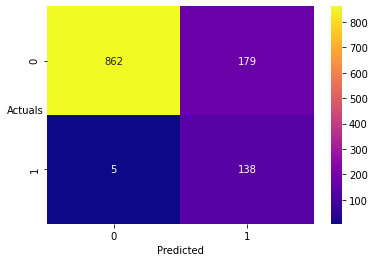

In [70]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [71]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 862 
False Positives: 179 
False Negatives: 5 
True Positives: 138


In [72]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.828     0.904      1041
           1      0.435     0.965     0.600       143

    accuracy                          0.845      1184
   macro avg      0.715     0.897     0.752      1184
weighted avg      0.927     0.845     0.867      1184



In [73]:
#Calculating sensitivity of the model
138/(138+5)


0.965034965034965

96% of those defaulted were correctly identified as defaulters by the model



In [74]:
#Calculating specificity of the model
862/(862+179)


0.8280499519692603

83% of those not defaulted were correctly identified as non-defaulters by the model



In [75]:
#Checking model efficiency
(138+862)/(138+862+179+5)


0.8445945945945946

Overall 84.5% of correct predictions to total predictions were made by the model



In [76]:
#Calculating misclassification rate
1-((138+862)/(138+862+179+5))

0.15540540540540537


### Find out the Altzman Score on test and train dataset	

#### Altman’s Z-score Model Formula
The Z-score model is based on five key financial ratios, and it relies on the information contained in the 10-K report. It increases the model’s accuracy when measuring the financial health of a company and its probability of going bankrupt.

The Altman’s Z-score formula is written as follows:

 

​ζ = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
 

Where:

- Zeta (ζ) is the Altman’s Z-score
- A is the Working Capital/Total Assets ratio
- B is the Retained Earnings/Total Assets ratio
- C is the Earnings Before Interest and Tax/Total Assets ratio
- D is the Market Value of Equity/Total Liabilities ratio
- E is the Total Sales/Total Assets ratio

In [81]:
df['Altman_score']=1.2*(df["Net_Working_Capital"]/df['total_assets'])+1.4*(df['Retained_Earnings']/df['total_assets'])+3.3*(df['PBIT']/df['total_assets'])+0.6*(df['Market_Value_of_Equity']/df['total_assets'])+0.999*(df['Total_Sales']/df['total_assets'])
df['Altman_score']

0      -0.739322
1       3.188570
2       2.766364
3       2.155517
4       0.902197
          ...   
3581    3.715410
3582    4.465261
3583    4.465261
3584    4.465261
3585    3.272963
Name: Altman_score, Length: 3586, dtype: float64

In [82]:
df['Altman_score'].describe()

count    3586.000000
mean        9.790270
std        68.107639
min      -397.359000
25%         1.159653
50%         3.453086
75%         5.752698
max      2190.262333
Name: Altman_score, dtype: float64

In [83]:
alt_class_pred=[]
for i in range(0,len(df['Altman_score'])):
    if np.array(df['Altman_score'])[i]<1.8:
        a=1
    else:
        a=0
    alt_class_pred.append(a)

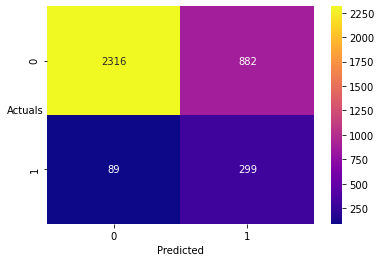

In [84]:
sns.heatmap((metrics.confusion_matrix(df['default'],alt_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [85]:
# Checking sensitivity of the model
299/(299+89)


0.770618556701031

77% of those defaulted were correctly identified as defaulters by the model



In [86]:
#Checking specificity

2316/(2316+882)


0.724202626641651

72% of those not defaulted were correctly identified as non-defaulters by the model



In [87]:
#Checking model efficiency

(2316+299)/(2316+299+882+89)


0.7292247629670943

Overall 73% of correct predictions to total predictions were made by the model



In [88]:
#Checking misclassification rate
1-((2316+299)/(2316+299+882+89))

0.27077523703290574

### Compare the Altzman's  Score with the Logistic Regression Model

## Part 2- Market Risk

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [89]:
market=pd.read_csv("Market Risk Dataset.csv")

In [90]:
market.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [91]:
market.columns = market.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

In [92]:
market.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [93]:
print('The number of rows (observations) is',market.shape[0],'\n''The number of columns (variables) is',market.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [94]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [95]:
market.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


Draw Stock Price Chart for any 2 variables

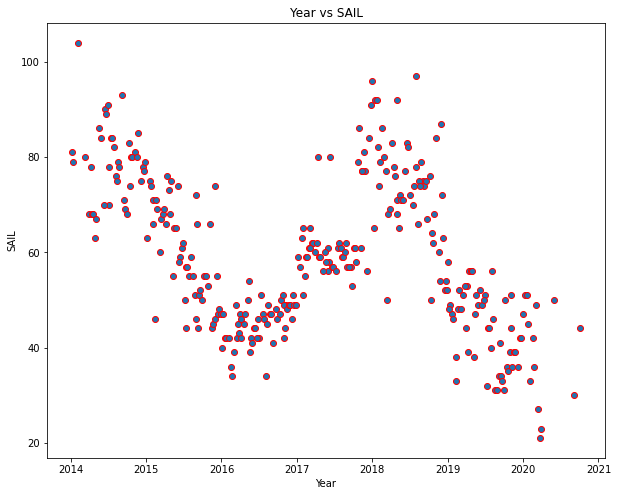

In [96]:
plt.figure(figsize = (10, 8))
market['dates'] = [pd.to_datetime(d) for d in market['Date']]
plt.scatter(market['dates'], market['SAIL'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('Year vs SAIL')

plt.show()

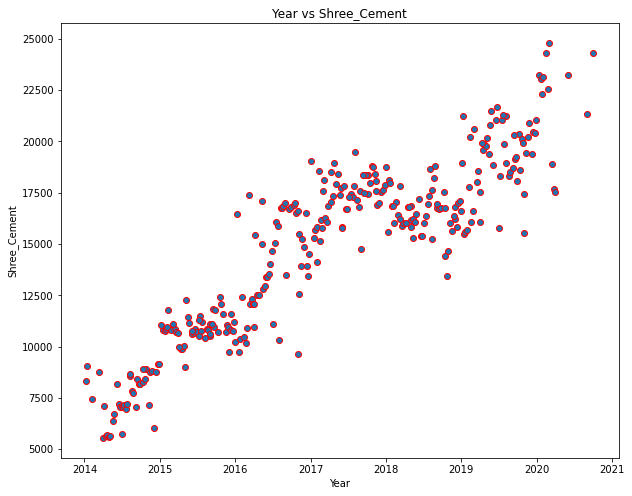

In [97]:
plt.figure(figsize = (10, 8))
market['dates'] = [pd.to_datetime(d) for d in market['Date']]
plt.scatter(market['dates'], market['Shree_Cement'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Year vs Shree_Cement')

plt.show()

### Calculate Returns

In [98]:
stock_returns = np.log(market.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [99]:
stock_returns.shape

(314, 10)

In [100]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846



### Calculate Stock Means and Standard Deviation

#### Stock Mean

In [101]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

####  Stock Standard Deviation

In [102]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64


### Draw a plot of Stock Means vs Standard Deviation and share insights

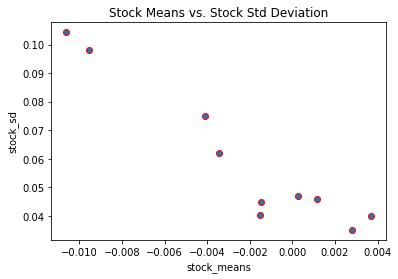

In [103]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('Stock Means vs. Stock Std Deviation')
plt.show()